## Visualisations with Python

There are many libraries for visualisations in Python. In this chapter, we will explore **Matplotlib** and **Seaborn**. But first we check the somewhat limited visualisation capabilities of Pandas.

### Pandas

In [26]:
import pandas as pd

Although Pandas is mainly a data handling library, it has some functions for plotting too.

The Series and Dataframe objects have **plot()** for basic plotting. By default, it makes line plots.

In [27]:
pe_df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/PE.csv',index_col=0)

pe_df['PE_ratio'] = pe_df['price']/pe_df['earnings']

pe_df.index = pd.date_range('1800', '1932', freq='Y')

The evolution of P/E-index from 1800 to 1931.

<AxesSubplot:>

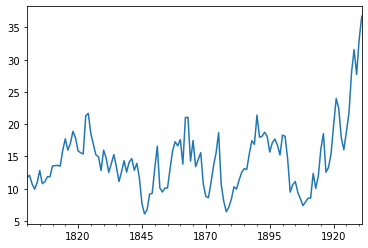

In [28]:
pe_df['PE_ratio'].plot()

The plot-object is passed to Matplotlib, so most of the Matplotlib parameters work also with Pandas plots.

Pandas has functions for KDE plots and histograms.

<AxesSubplot:>

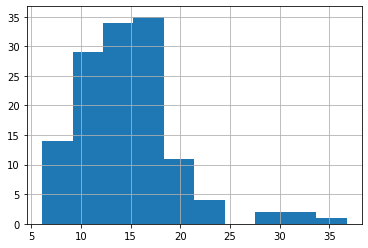

In [29]:
pe_df['PE_ratio'].hist()

<AxesSubplot:ylabel='Density'>

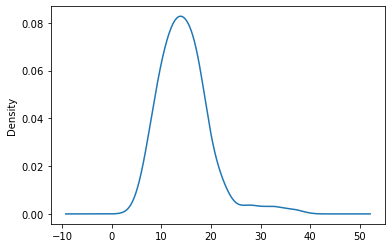

In [30]:
pe_df['PE_ratio'].plot.density()

Pandas bar plots. Notice how they are invoked using **plot.bar()**.

In [31]:
know_df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/politicalKnowledge.csv',index_col=0)

In [32]:
know_df.set_index('country',inplace=True)

Political knowledge in the US and Europe (high school background).

<AxesSubplot:xlabel='country'>

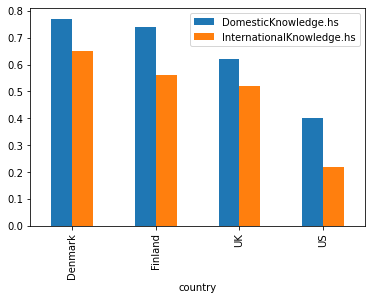

In [33]:
know_df[['DomesticKnowledge.hs','InternationalKnowledge.hs']].plot.bar()

And horisontal bars. Political knowledge in the US and Europe (college background).

<AxesSubplot:ylabel='country'>

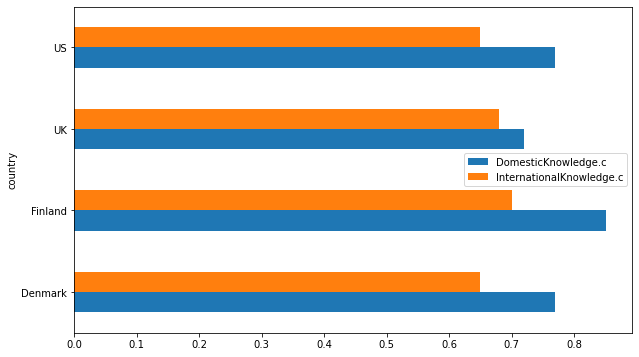

In [34]:
know_df[['DomesticKnowledge.c','InternationalKnowledge.c']].plot.barh(figsize=(10,6))

With the **stacked = True**, you change grouped bars to stacked bars. Political knowledge in the US and Europe (high school/some college/college background stacked together).

<AxesSubplot:xlabel='country'>

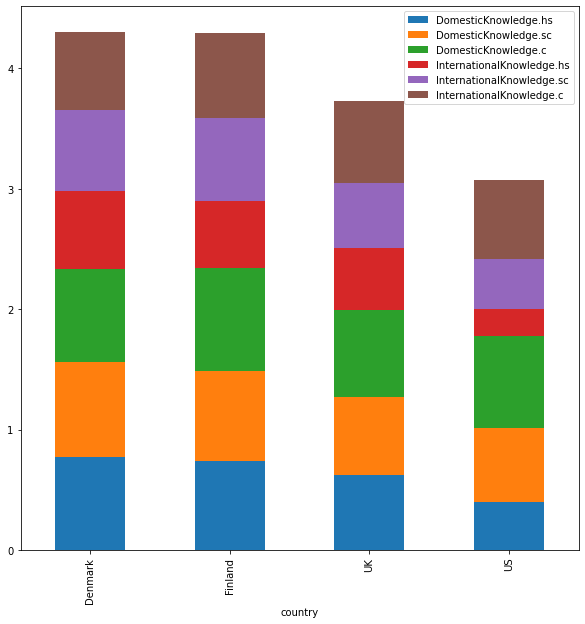

In [35]:
know_df[['DomesticKnowledge.hs', 'DomesticKnowledge.sc', 'DomesticKnowledge.c',
       'InternationalKnowledge.hs', 'InternationalKnowledge.sc',
       'InternationalKnowledge.c']].plot.bar(stacked=True,figsize=(10,10))

### Matplotlib

In the following, we will go through the basic features of Matplotlib. One important thing to remember is that Jupyter will reset most of the settings after each cell is evaluated. So most of the operations need to be executed in a single cell.

Functions for basic plots are in the **matplotlib.pyplot** module.

In [36]:
import matplotlib.pyplot as plt

You can use many different styles for your plots. The full list of styles is here:

In [37]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

I usually find the **bmh** style the most appealing. **Fivethirtyeight** and **ggplot** are also good.

In [38]:
plt.style.use('bmh')

**Plot()** is for plotting of sequence-like objects.

In [39]:
import numpy as np
values = np.random.uniform(-1.,1.,size=(100))
csum_values=np.cumsum(values)

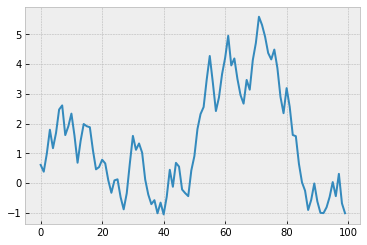

In [40]:
plt.plot(csum_values)
plt.show()

Although plots will show in jupyter notebooks without **plt.show()**, by adding it we can remove useless textual information above the plots.

As I mentioned earlier, everything in Python are objects, also Matplotlib figures. The following command will add an empty template without any plots.

In [41]:
template = plt.figure()

<Figure size 432x288 with 0 Axes>

We can add plots to the template using **add_subplot()**. The plots are addes as **axes**-objects.

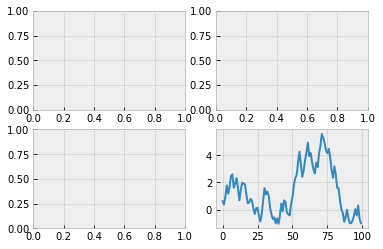

In [42]:
template = plt.figure()
ax1 = template.add_subplot(2,2,1)
ax2 = template.add_subplot(2,2,2)
ax3 = template.add_subplot(2,2,3)
ax4 = template.add_subplot(2,2,4)
plt.plot(csum_values)
plt.show()

By default, Matplotlib will add the plot to the last axex-object added. You can add to a specific axes-object by using its name.

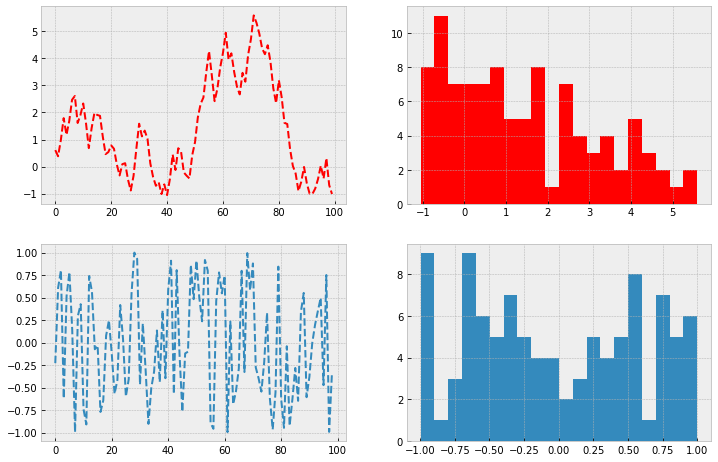

In [43]:
template = plt.figure(figsize=(12,8))
ax1 = template.add_subplot(2,2,1)
ax2 = template.add_subplot(2,2,2)
ax3 = template.add_subplot(2,2,3)
ax4 = template.add_subplot(2,2,4)
ax1.plot(csum_values,'r--')
ax2.hist(csum_values,bins=20,color='r')
ax3.plot(np.diff(csum_values),linestyle='--')
ax4.hist(np.diff(csum_values),bins=20)
plt.show()

As you can see from the above example, colors, linestyles, etc. are defined using string codes.

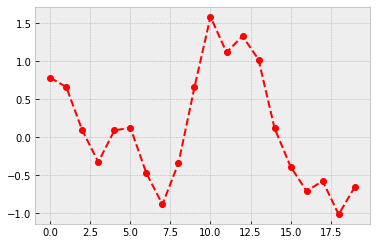

In [44]:
plt.plot(csum_values[20:40],'ro--')
plt.show()

The string codes are convenient, if you know them. But learning them takes a little time. Consult the Matplotlib documentation for full list of the string codes: [matplotlib.org](https://matplotlib.org/). You can draw the above figure using a more explicit syntax.

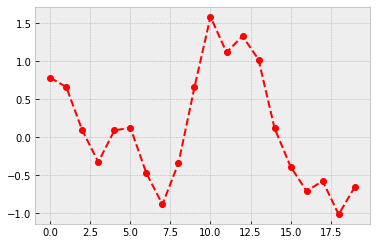

In [45]:
plt.plot(csum_values[20:40], color='r',marker='o',linestyle='dashed')
plt.show()

By default, adjacent points in line plots are connected with linear interpolation. With **drawstyle**, you can use also constant values.

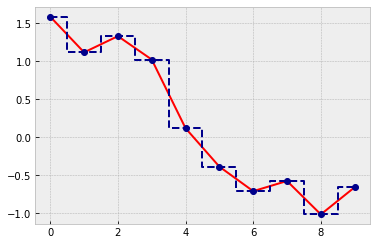

In [46]:
plt.plot(csum_values[30:40], color='r')
plt.plot(csum_values[30:40], color='darkblue',marker='o',linestyle='dashed',drawstyle='steps-mid')
plt.show()

Let's load a more interesting dataset.

In [47]:
import pandas as pd
comp_df = pd.read_csv('stat_data.csv',index_col=0)

In [48]:
numer = comp_df.columns[2:6]
comp_df[numer] = comp_df[numer].clip(lower=comp_df[numer].quantile(0.025),
                                                   upper=comp_df[numer].quantile(0.975),axis=1)

In [49]:
comp_df

,NAME,DIV. YIELD,ROE (%),R&D/SALES (%),CoGS/SALES - 5 Y (%),SG%A/SALES 5Y (%),ACCOUNTING STANDARD,Accounting Controversies,Basis of EPS data,INDUSTRY GROUP,IBES COUNTRY CODE
0,APPLE,0.71,55.92,4.95,56.6400,6.53,US standards (GAAP),N,NaN,4030.0,US
1,SAUDI ARABIAN OIL,0.21,32.25,NaN,NaN,NaN,IFRS,N,EPS,5880.0,FW
2,MICROSOFT,1.07,40.14,13.59,26.4600,19.56,US standards (GAAP),N,NaN,4080.0,US
3,AMAZON.COM,0.00,21.95,12.29,56.8200,21.28,US standards (GAAP),N,NaN,7091.0,US
4,FACEBOOK CLASS A,0.00,19.96,21.00,7.0600,20.42,US standards (GAAP),N,NaN,8580.0,US
...,...,...,...,...,...,...,...,...,...,...,...
295,BHP GROUP,4.23,16.61,NaN,45.5000,NaN,IFRS,N,IFRS,5210.0,EX
296,CITIC SECURITIES 'A',1.67,7.77,NaN,10.9100,27.44,IFRS,N,EPS,4395.0,FC
297,EDWARDS LIFESCIENCES,0.00,28.73,16.09,23.3300,30.22,US standards (GAAP),N,NaN,3440.0,US
298,GREE ELECT.APP. 'A',2.25,24.52,NaN,66.3500,14.94,Local standards,N,EPS,3720.0,FC


We can add all the axes-objects at once using **plt.subplots()**. In the following for-loop, we use **two** iterators. One is going through the axes objects and other is going through specific columns from the dataframe. For that, we need to use **zip()**.

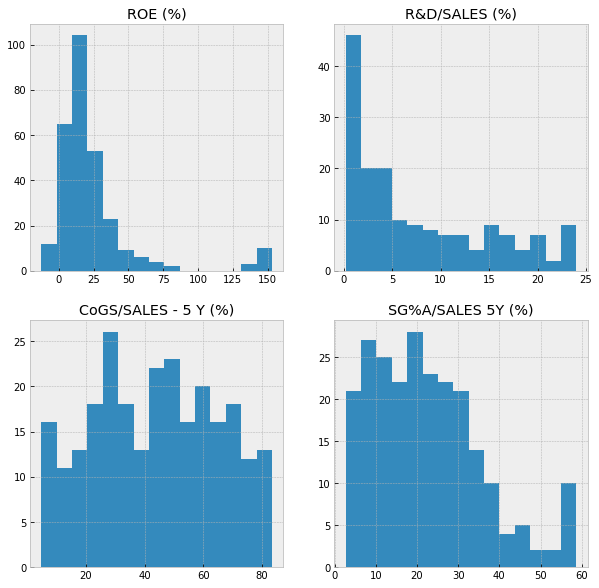

In [50]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
for ax, column in zip(axes.flat,comp_df.columns[2:6]):
    ax.hist(comp_df[column],bins=15)
    ax.set_title(column)

Matplotlib has a huge collection of different plot types.

The boxplot function, which does not work with missing values.

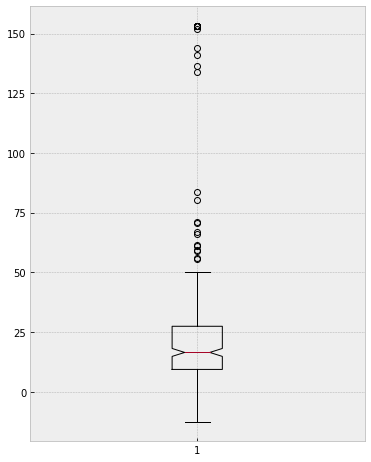

In [51]:
plt.figure(figsize=(6,8))
plt.boxplot(comp_df['ROE (%)'].dropna(),notch=True)
plt.show()

The horisontal bar plot function. There is also a function for a vertical bar plot.

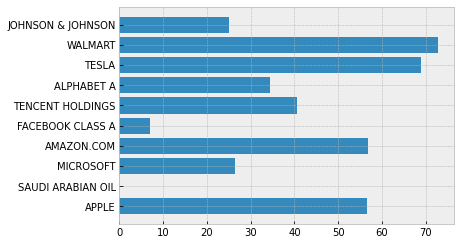

In [52]:
plt.barh(comp_df['NAME'][0:10],comp_df['CoGS/SALES - 5 Y (%)'][0:10])
plt.show()

We already saw the normal histogram function, **hist()**. There is also a function for two-dimensional histograms.

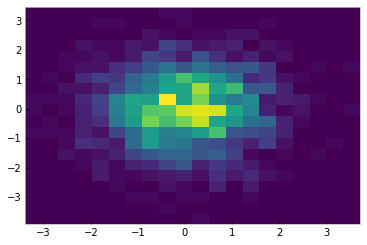

In [53]:
plt.hist2d(np.random.normal(size=2000),np.random.normal(size=2000),bins=20)
plt.show()

A lineplot with log-log scales. With **legend()**, you can add a legend to your plots.

In [54]:
euro_df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/EuStockMarkets.csv',index_col=0)

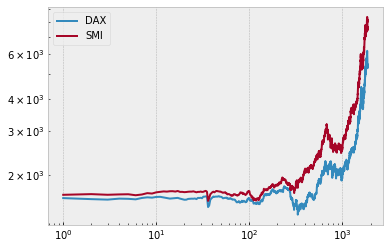

In [55]:
plt.loglog(euro_df['DAX'],label='DAX')
plt.loglog(euro_df['SMI'],label='SMI')
plt.legend()
plt.show()

There is also a function for pie charts. Let's bin the R&D/SALES -variable for a meaningful data to use in a pie chart.

In [56]:
categs = pd.cut(comp_df['R&D/SALES (%)'],4)

With **title()**, you can add a title.

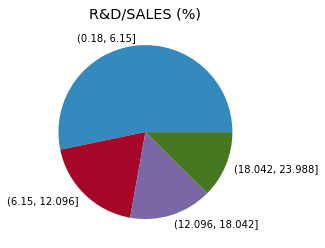

In [57]:
plt.pie(categs.value_counts(),labels=categs.value_counts().index)
plt.title('R&D/SALES (%)')
plt.show()

A polar plot.

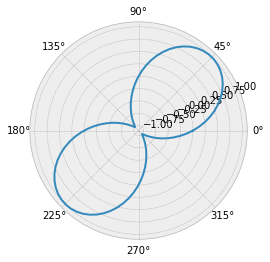

In [58]:
plt.polar(np.linspace(0,2*np.pi,100),np.sin(2*np.linspace(0,2*np.pi,100)))

In [59]:
euro_df['DAX'].pct_change()

1            NaN
2      -0.009283
3      -0.004412
4       0.009044
5      -0.001777
          ...   
1856   -0.024631
1857   -0.031985
1858    0.019138
1859   -0.005924
1860    0.022164
Name: DAX, Length: 1860, dtype: float64

Power Spectral Density can be used to recognise cycles in a time series.

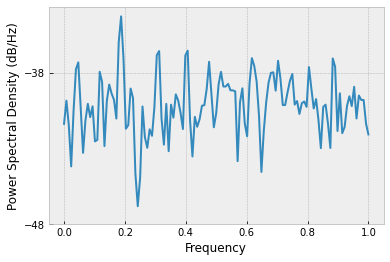

In [60]:
plt.psd(euro_df['DAX'].pct_change()[1:])
plt.show()

Matplotlib allows you to customise almost everything in its plots. We already saw how to add a title and a legend to plots. We can also add axis titles and customise ticks/tickmarks.

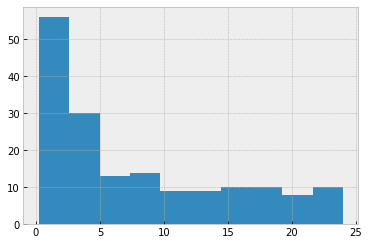

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(comp_df['R&D/SALES (%)'])
plt.show()

Let's add axis titles to the histogram, and customise its x-ticks. The number of ticks and tick labels must be equal.

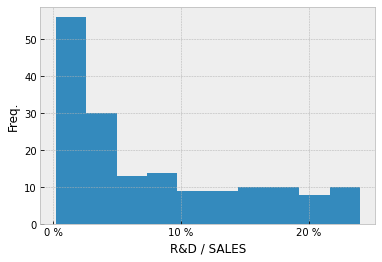

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(comp_df['R&D/SALES (%)'])
ax.set_xticks([0,10,20])
ax.set_xticklabels(['0 %', '10 %', '20 %'])
ax.set_xlabel('R&D / SALES')
ax.set_ylabel('Freq.')
plt.show()

A very convenient feature in Matplotlib is annotation. With **annotate**, we can highlight important points in figures.

In [63]:
from datetime import datetime

euro_df.index = pd.date_range('1991-01-01', '1998-02-16', freq='B')

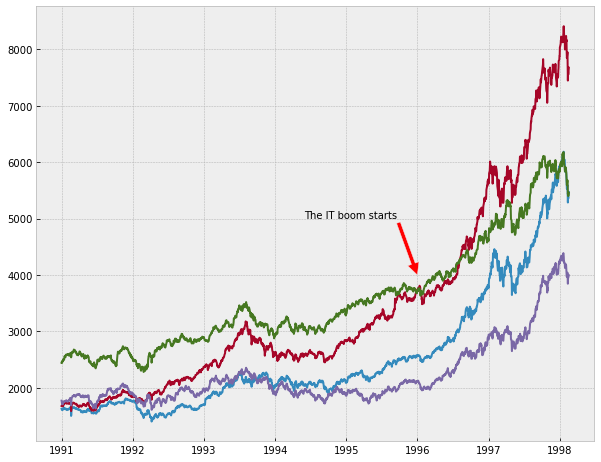

In [64]:
plt.figure(figsize=(10,8))
plt.plot(euro_df)
plt.annotate('The IT boom starts',xy=(datetime(1996,1,1),4000),
             xytext=(datetime(1994,6,1),5000),arrowprops=dict(facecolor='red'))
plt.show()

When you are happy with your figure, you can save it to a file using **savefig()**. The function has many convenient parameters. You can read more about them here: [matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html?highlight=savefig](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html?highlight=savefig).

If you want to change the default settings of Matplotlib, you can use **rc()**. This will change settings for all cells not just the cell you are executing. For example, to change the default settings of the lines, you can write:

In [54]:
plt.rc('lines', linewidth=1, linestyle='dashed')

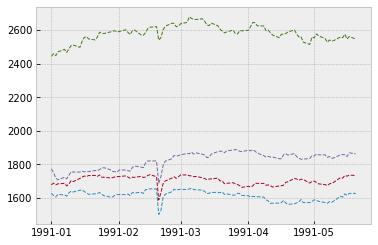

In [55]:
plt.plot(euro_df.iloc[0:100])
plt.show()

You can restore default settings with **rcdefaults()**.

In [61]:
plt.rcdefaults()
plt.style.use('bmh')

### Seaborn

Seaborn is a plotting library built on top of Matplotlib. It is especially designed for statistical plotting. Seaborn has very beautiful plots by default, and you get publication-quality plots from it without exhaustive parameter tuning.

In [62]:
import seaborn as sns

The bar plot in Seaborn adds automatically error bars to the plot

In [63]:
euro_ret = euro_df.pct_change()

euro_ret.drop(datetime(1991,1,1),inplace=True)

unstacked = euro_ret.unstack().to_frame()

unstacked.rename({0:'Return'},axis=1,inplace=True)

<AxesSubplot:xlabel='Return'>

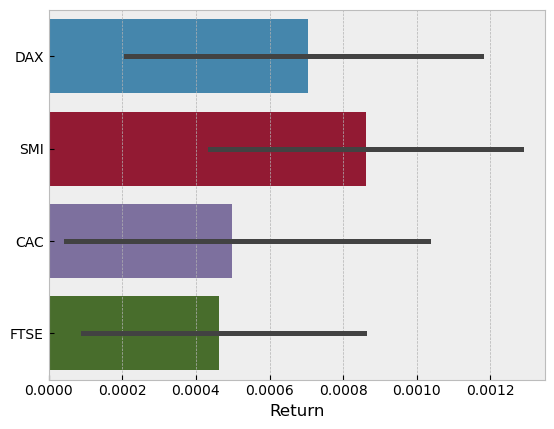

In [64]:
sns.barplot(x=unstacked['Return'],y=unstacked.index.get_level_values(0))

Seaborn has efficient tools for histograms and KDEs.

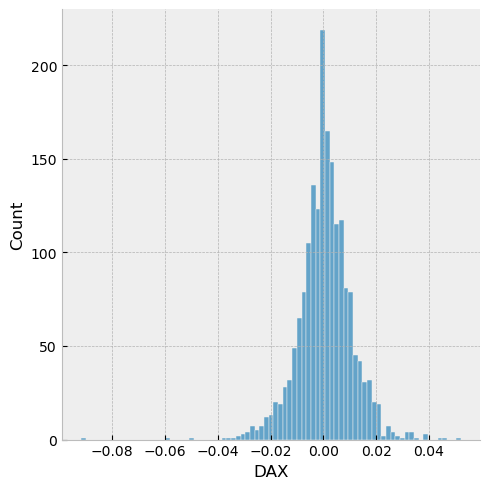

In [70]:
sns.displot(euro_ret['DAX'],kind='hist')

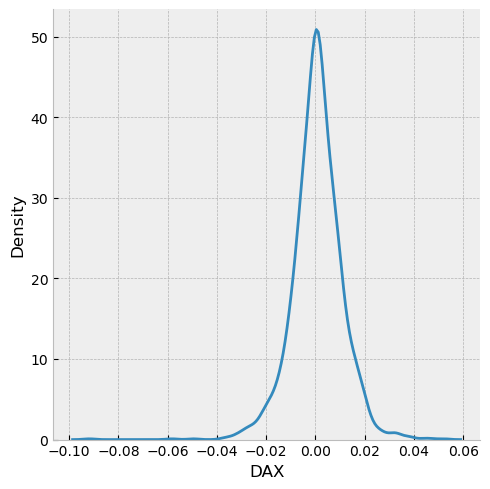

In [71]:
sns.displot(euro_ret['DAX'],kind='kde')

**Regplot** is important for linear regression. We need to reset Matplotlib settings, because **regplot** is not working correctly with the **bmh** style.

In [75]:
plt.rcdefaults()
sns.set_theme(color_codes=True)

In [77]:
comp_df

,NAME,DIV. YIELD,ROE (%),R&D/SALES (%),CoGS/SALES - 5 Y (%),SG%A/SALES 5Y (%),ACCOUNTING STANDARD,Accounting Controversies,Basis of EPS data,INDUSTRY GROUP,IBES COUNTRY CODE
0,APPLE,0.71,55.92,4.95,56.6400,6.53,US standards (GAAP),N,NaN,4030.0,US
1,SAUDI ARABIAN OIL,0.21,32.25,NaN,NaN,NaN,IFRS,N,EPS,5880.0,FW
2,MICROSOFT,1.07,40.14,13.59,26.4600,19.56,US standards (GAAP),N,NaN,4080.0,US
3,AMAZON.COM,0.00,21.95,12.29,56.8200,21.28,US standards (GAAP),N,NaN,7091.0,US
4,FACEBOOK CLASS A,0.00,19.96,21.00,7.0600,20.42,US standards (GAAP),N,NaN,8580.0,US
...,...,...,...,...,...,...,...,...,...,...,...
295,BHP GROUP,4.23,16.61,NaN,45.5000,NaN,IFRS,N,IFRS,5210.0,EX
296,CITIC SECURITIES 'A',1.67,7.77,NaN,10.9100,27.44,IFRS,N,EPS,4395.0,FC
297,EDWARDS LIFESCIENCES,0.00,28.73,16.09,23.3300,30.22,US standards (GAAP),N,NaN,3440.0,US
298,GREE ELECT.APP. 'A',2.25,24.52,NaN,66.3500,14.94,Local standards,N,EPS,3720.0,FC


<AxesSubplot:xlabel='DIV. YIELD', ylabel='ROE (%)'>

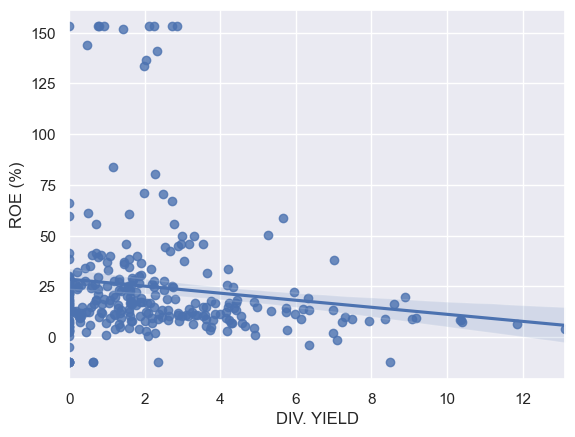

In [79]:
sns.regplot('DIV. YIELD','ROE (%)',data=comp_df)

**Pairplot** is an excellent tool for quick exploratory analysis. It adds scatter graphs and  histograms into a single figure.

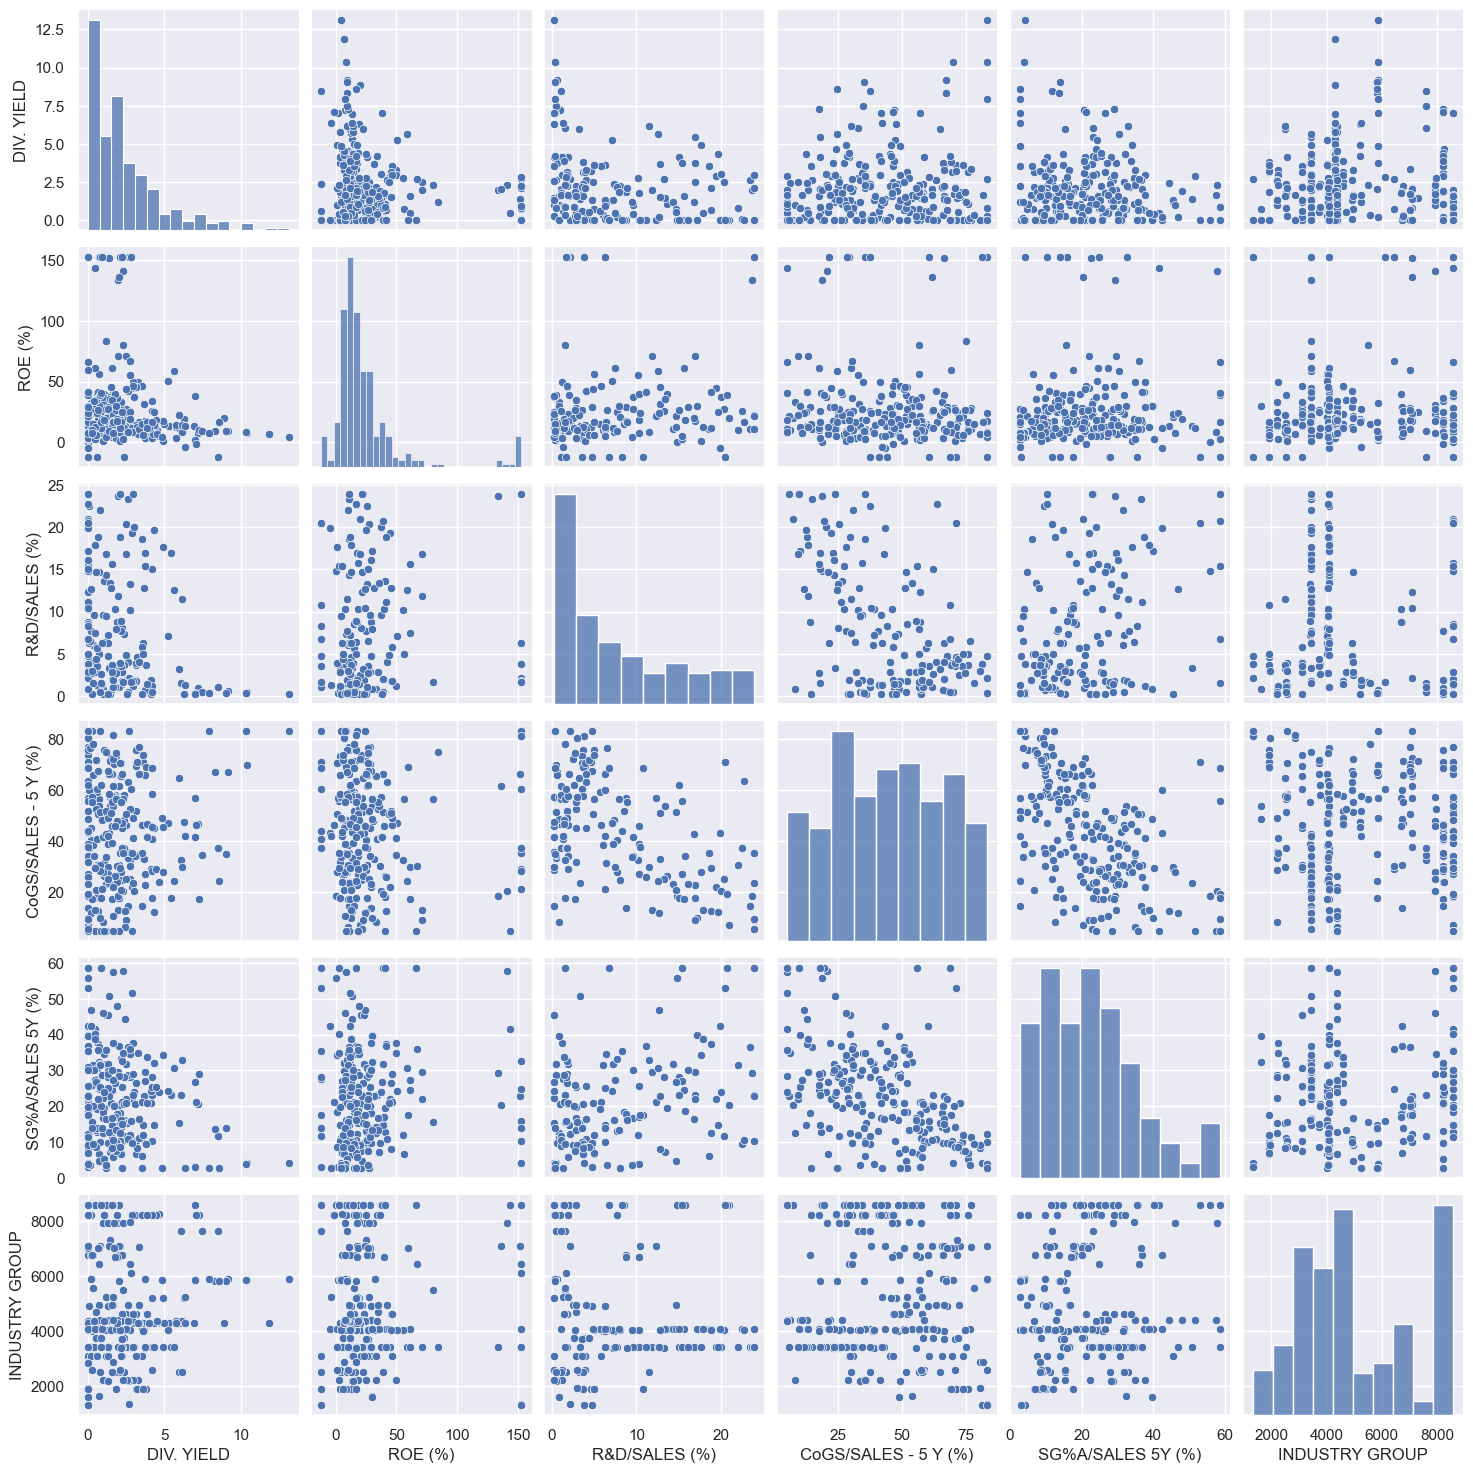

In [81]:
sns.pairplot(comp_df)

With **catplot**, you can catogorise data in multiple ways simultaneously.

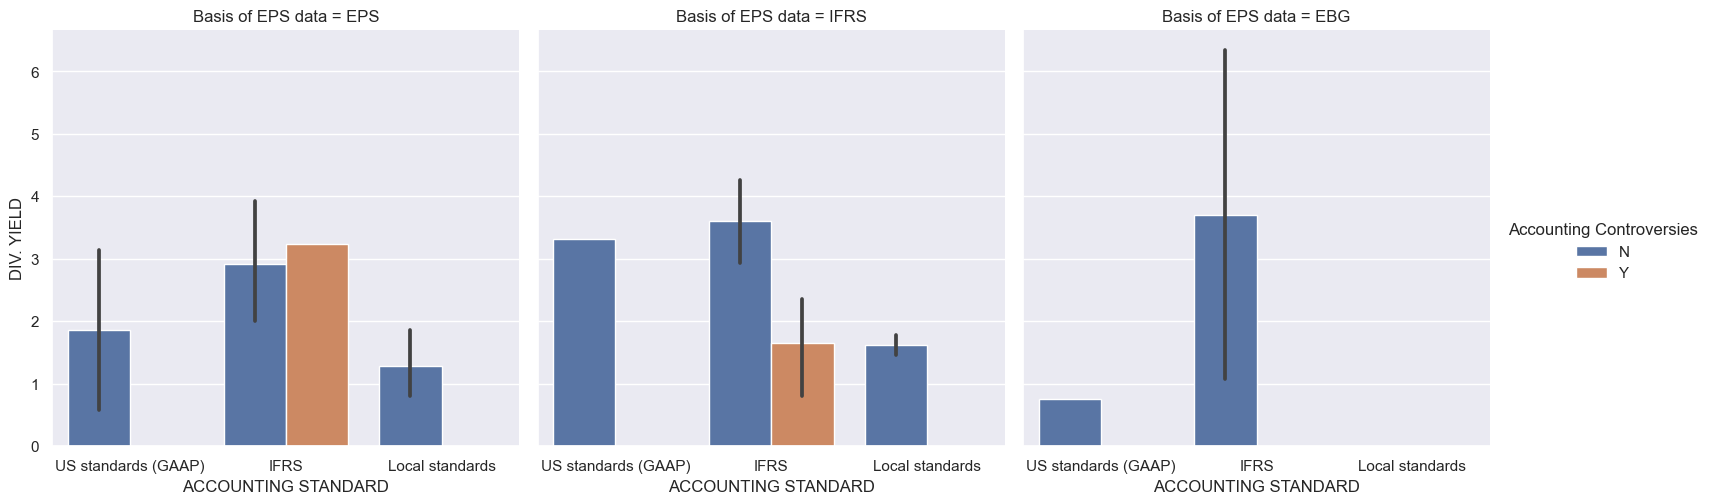

In [89]:
sns.catplot(x='ACCOUNTING STANDARD',y='DIV. YIELD',
               hue='Accounting Controversies',col='Basis of EPS data',kind='bar',data=comp_df)
plt.show()

There is also the boxplot option in **catplot**.

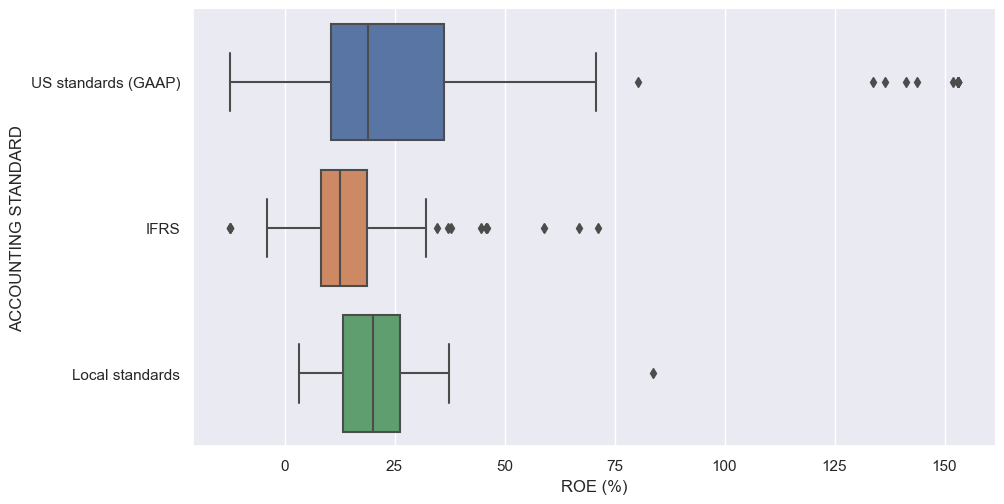

In [96]:
sns.catplot(x='ROE (%)',y='ACCOUNTING STANDARD',kind='box',data=comp_df,aspect=2)

There are numerous other visualisation libraries in Python. Other important, which we do not have covered here, are at least [Plotly](https://plotly.com/), [Bokeh](https://docs.bokeh.org/en/latest/index.html) and [Altair](https://altair-viz.github.io/), but there are numerous others and new libraries are introduced all the time.